In [42]:
import numpy as np
import cv2
import matplotlib.pyplot as plt
from ipywidgets import interact, IntSlider

In [11]:
def mostrar_imagen(titulo, imagen):
    plt.figure()
    plt.title(titulo)
    if len(imagen.shape) == 2:  # Imagen en escala de grises
        plt.imshow(imagen, cmap='gray')
    else:  # Imagen a color (BGR de OpenCV)
        plt.imshow(cv2.cvtColor(imagen, cv2.COLOR_BGR2RGB))
    plt.show()

In [12]:
img_rgb_big = cv2.imread('Lentejas.jpg')
h,w = img_rgb_big.shape[:2]
print('Altura=', h, 'pixels')
print('Ancho=', w, 'pixels')

Altura= 3120 pixels
Ancho= 4160 pixels


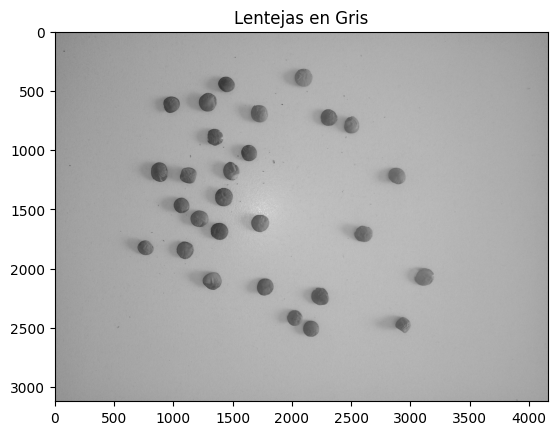

In [13]:
# Siempre en gris
img_gray = cv2.cvtColor(img_rgb_big, cv2.COLOR_BGR2GRAY)
mostrar_imagen('Lentejas en Gris', img_gray)

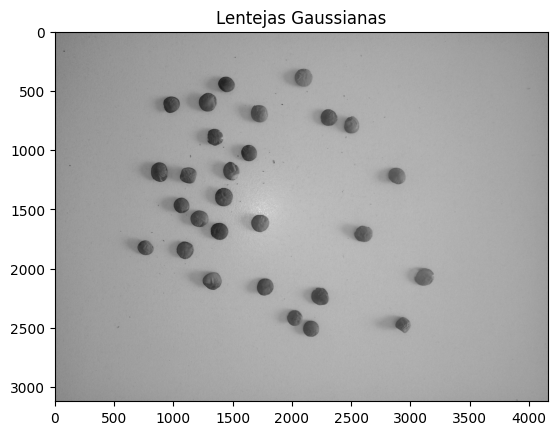

In [15]:
img_gauss = cv2.GaussianBlur(img_gray, (5,5), 0)
mostrar_imagen('Lentejas Gaussianas', img_gauss)

In [28]:
"""
umbral, lentejas_otsu = cv2.threshold(img_gauss, 0, 255, cv2.THRESH_BINARY + cv2.THRESH_OTSU)
mostrar_imagen('Lentejas Umbraladas (Otsu)', lentejas_otsu)
print('Umbral de Otsu calculado:', umbral)
"""
def interactive_threshold(manual_thresh):
    _, lentejas_manual_thresh = cv2.threshold(img_gauss, manual_thresh, 255, cv2.THRESH_BINARY)
    mostrar_imagen(f'Umbralado Manual (Umbral={manual_thresh})', lentejas_manual_thresh)
    print('Umbral de Otsu calculado:', umbral)


interact(interactive_threshold, manual_thresh=IntSlider(min=0, max=255, step=1, value=int(umbral), description='Umbral Manual:'))

interactive(children=(IntSlider(value=160, description='Umbral Manual:', max=255), Output()), _dom_classes=('w…

<function __main__.interactive_threshold(manual_thresh)>

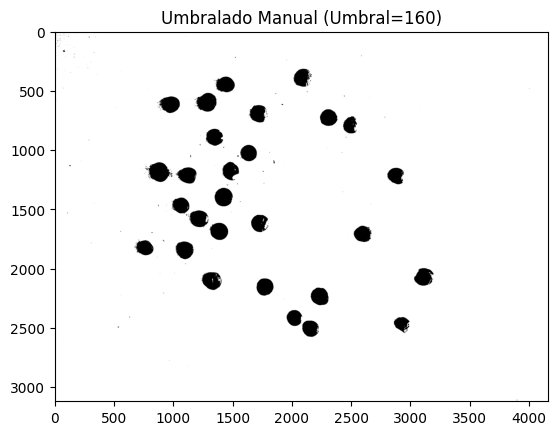

In [32]:
_, lentejas_manual_thresh = cv2.threshold(img_gauss, 160, 255, cv2.THRESH_BINARY)
mostrar_imagen(f'Umbralado Manual (Umbral=160)', lentejas_manual_thresh)


In [33]:
# Re-binarizar la imagen para una mejor detección de contornos, usando el umbral de Otsu y THRESH_BINARY_INV
_, lentejas_binarizadas_para_contornos = cv2.threshold(img_gauss, 160, 255, cv2.THRESH_BINARY_INV)

contornos, jerarquia = cv2.findContours(lentejas_binarizadas_para_contornos.copy(), cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)
print(f"Se encontraron {len(contornos)} contornos iniciales.")

Se encontraron 422 contornos iniciales.


In [44]:
import numpy as np
from ipywidgets import interact, IntSlider, FloatSlider

def update_contour_detection(min_area_val, ratio_val):
    # Crear una copia de la imagen original para dibujar y no modificar la original repetidamente
    img_rgb_dibujo = img_rgb_big.copy()

    contornos_validos = []
    lentejas_contadas = 0
    for cnt in contornos:
        area = cv2.contourArea(cnt)
        if area > min_area_val:
            contornos_validos.append(cnt)

            # Encontrar el círculo mínimo que lo rodea
            (x, y), radius = cv2.minEnclosingCircle(cnt)
            area_circulo_ideal = np.pi * (radius ** 2)

            ratio = area / area_circulo_ideal

            if ratio > ratio_val: # Umbral a ajustar experimentalmente
                cv2.circle(img_rgb_dibujo, (int(x), int(y)), int(radius), (0, 255, 0), 2)
                lentejas_contadas += 1

    print(f"Se encontraron {len(contornos_validos)} contornos válidos (con área > {min_area_val}).")
    print(f"Se detectaron {lentejas_contadas} lentejas válidas (con ratio > {ratio_val}).")
    mostrar_imagen('Imagen con Lentejas detectadas', img_rgb_dibujo)

# Establecer un valor inicial razonable para min_area. Utilizaremos el valor de la variable existente si está disponible, o un valor predeterminado.
default_min_area = 10 if 'min_area' not in locals() else min_area

interact(update_contour_detection,
         min_area_val=IntSlider(min=0, max=500, step=1, value=default_min_area, description='Área Mínima:'),
         ratio_val=FloatSlider(min=0.0, max=1.0, step=0.01, value=0.8, description='Ratio Mínimo:')
        )

interactive(children=(IntSlider(value=10, description='Área Mínima:', max=500), FloatSlider(value=0.8, descrip…

<function __main__.update_contour_detection(min_area_val, ratio_val)>

# Resultados del trabajo de Umbralado:

### Se encontraron 28 contornos válidos (con área > 189).

### Se detectaron 28 lentejas válidas (con ratio > 0.6).

# Lo mismo pero con Canny

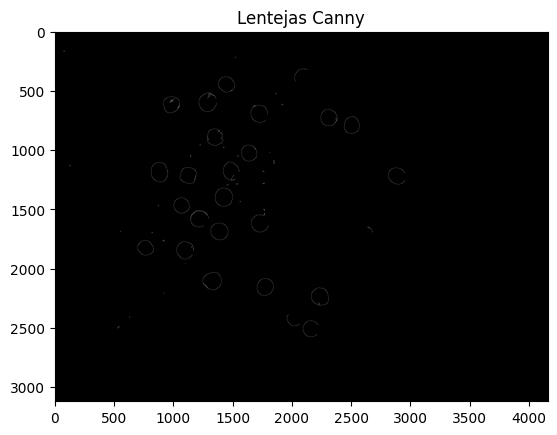

In [20]:
lentejas_canny = cv2.Canny(img_gauss, threshold1=25, threshold2=200)
mostrar_imagen('Lentejas Canny', lentejas_canny)

In [24]:
from ipywidgets import interact, IntSlider
print("ipywidgets interact and IntSlider imported.")

ipywidgets interact and IntSlider imported.


In [23]:
def update_canny(Th1, Th2):
    lentejas_canny_interactive = cv2.Canny(img_gauss, threshold1=Th1, threshold2=Th2)
    mostrar_imagen('Lentejas Canny Interactivo', lentejas_canny_interactive)

print("Function 'update_canny' defined.")

Function 'update_canny' defined.


In [25]:
interact(update_canny, Th1=IntSlider(min=0, max=255, step=1, value=25, description='Umbral Th1:'), Th2=IntSlider(min=0, max=255, step=1, value=200, description='Umbral Th2:'))


interactive(children=(IntSlider(value=25, description='Umbral Th1:', max=255), IntSlider(value=200, descriptio…

<function __main__.update_canny(Th1, Th2)>